# Welcome!

The purpose of this file (and the ones that follow after it) is to give users a quick overview of how to run the eco sim.  After reading through the tutorial files, you should be able to quickly harness most facets of the simulator with ease. 

To begin, you'll need to install the simulator on your computer by running `pip install b2sim`. Once you do this, it's time to import the libraries...

In [1]:
import b2sim.engine as b2
import b2sim.analysis as dd

The libary is split into two subpackages, the "engine" subpackage, which concerns the construction and execution of simulations, and the "analysis" subpackage, which concerns displaying the results of the simulation for analysis.

## Your First Simulation

To create a simulation using the b2sim module, you'll need to follow this procedure:
1. Determine the lengths of the rounds in the simulator using the `Rounds` class.
2. Define the farms that you have at simulation start by using the `initFarm` call.
3. Specify the purchases you intend to make (buy queue) and the eco flowchart you intend to follow (eco queue).
4. Define the initial state of the game. (What round should the simulation start on, and how much cash and eco will you have at that time?)
5. Simulate to the time that you want to simulate to.

Depending on what you intend to simulate, some the above steps may either change slightly or may not be necessary at all. For example, if you're playing eco, step 2 obviously is not necessary. If you're playing with boat farms, in step 2 you'll declare those farms. If you don't intend to make any purchases or change your eco send throughout the simulation, step 3 is not necessary. Steps 1, 4, and 5 are always necessary, however.

For our first simulation, we will keep things simple by working through an example which does not require use of the buy queue and eco features (we'll explain these more later).

## Eco'ing With Farms (The Basics)

The name "eco simulator" is a bit of misnomer, because in fact the sim can handle computations concerning simultaneous investment into farms and eco. To begin, I'm going to run a simulation from *just* before the start of round 14 to the start of round 17 where the player has access to $2 \times 320$ farms, $800$ eco, and decides to send grouped black eco the whole way through the simulation. We begin by following the 5 step process outlined above:

### Step 1: Determine the Round Lengths

The rounds class determines how long the rounds are in our simulation. The easiest way to initialize it is to simply use a number from $0$ to $1$ representing the level of stall of *stall factor* of each of the rounds. A stall factor of $0$ indicates a fully anti-stalled game while a stall factor of $1$ indicates a fully stalled game. You can be as detailed as setting the round lengths manually if you like, but for now, we'll stick to this simple syntax and explain less coarse methods for determining round lengths later.

In [2]:
rounds = b2.Rounds(0.1)

### Step 2: Define the farms at initial time

Farms should be declared as a list of `initFarm` calls. Within the `initFarm` call, the first argument denotes when the farm was purchased/last upgraded (measured as seconds after game start), while the second argument determines what upgrades the farms have. Setting a purchase time is important to the extent that farms have different rules for paying out when bought mid-round versus before a round. For more details, see the tutorial files on farms. 

In almost all cases, it is more useful rather than trying to set a time directly to set the time based on rounds by using `rounds.getTimeFromRound`. Decimal values can be used to specify times between rounds, so `round.getTimeFromRound(13.9)` is interpreted as "9/10ths the way through Round 13".

In [4]:
farms = [
    b2.initFarm(rounds.getTimeFromRound(7), upgrades = [3,2,0]),
    b2.initFarm(rounds.getTimeFromRound(13.9), upgrades = [3,2,0])
]

### Step 3: Specify the flowchart

In our case, there is no proper flowchart for us to specify since we do not intend to change eco sends or make purchases during the simulation. In the next section, however, we will go over this step in more detail.

### Step 4: Define the initial state of the game

The initial state contains all the important information necessary that the simulator needs to run. Generally speaking, every initial state *should* contain the following:
1. Cash - Specifies starting cash.
2. Eco - Specifies starting eco.
3. Loan - Specifies current debt. You can leave this blank if you don't have any debt.
4. Eco Send - Specifies the eco send to begin the simulation with. You can leave this blank if you instead the place the starting send in the eco queue.
5. Eco Queue - Specifies what eco sends the player intends to use throughout the simulation and what times to use them.
6. Buy Queue - Specifies what purchases the player intends to make throughout the simulation.
7. Rounds - Put the `Rounds` object that you initialized earlier here. This determines the round lengths in the simulation.
8. Farms - Specifies what farms you have at simulation start. You can leave this blank if your simulation doesn't have farms
9. Game Round / Game Time - Specifies when the simulation starts.

In [5]:
initial_state_game = {
    'Cash': 0,
    'Eco': 800,
    'Eco Send': b2.ecoSend(send_name = 'Grouped Blacks'),
    'Rounds': rounds, #Determines the lengths of the rounds in the game state
    'Farms': farms,
    'Game Round': 13.99
}

### Step 5: Simulate! 

The hardest part of running the code is setting up the simulation. Running the simulation itself is actually easy! The vehicle for simulation is the `GameState` class. By initializing a `GameState` object with our initial state defined above, we can simulate to whatever time we desire by using the `GameState` class's `fastForward()` method along with a time we want to simulate to. To view the results of the simulation afterwards, use the `viewHistory()` method from the `analysis` subclass.

[{'Time': 222.29999999999998, 'Send Name': 'Grouped Blacks', 'Max Send Amount': None, 'Fortified': False, 'Camoflauge': False, 'Regrow': False, 'Max Eco Amount': None, 'Max Send Time': None, 'Queue Threshold': 6}]


,Time,Type,Message
0,284.8,Eco,Change eco to Grouped Blacks
1,285.0,Round,Round 14 start
2,297.0,Round,Round 15 start
3,313.4,Round,Round 16 start
4,346.4,Round,Round 17 start


,Revenue,Expenses,Profit,Eco Impact,Start Time,End Time
Farm Index,,,,,,
0,2450.0,0,2450.0,238.0,285.0,346.0
1,2450.0,0,2450.0,238.0,285.0,346.0


The current cash and eco are (1083.0,1391.0)


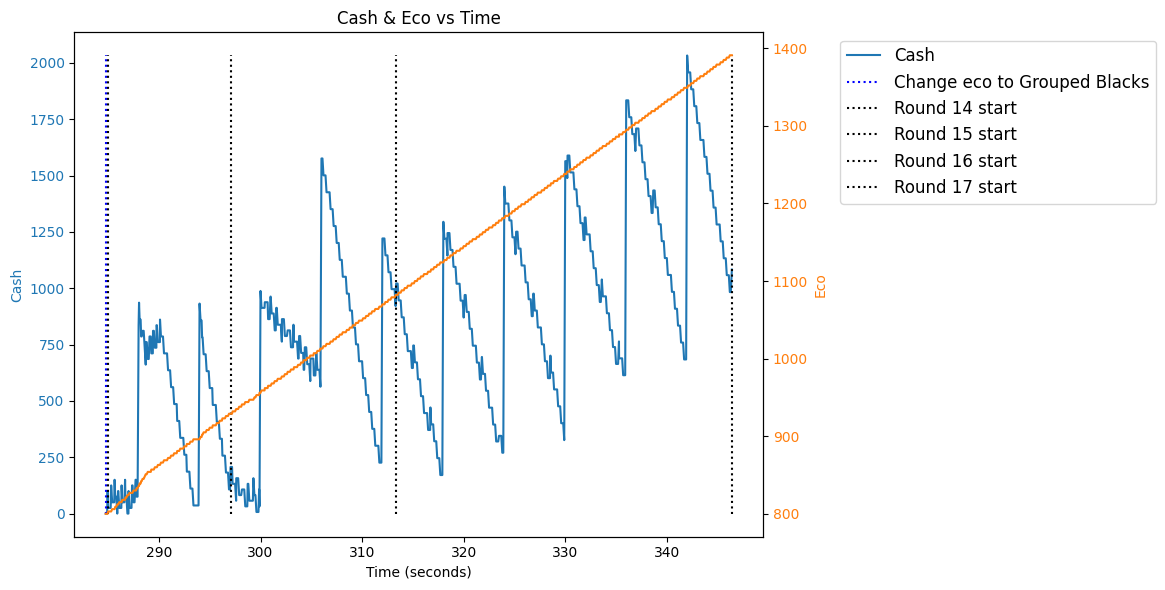

In [6]:
game_state = b2.GameState(initial_state_game)
game_state.fastForward(target_round = 17)
dd.viewHistory(game_state)
print("The current cash and eco are (%s,%s)"%(game_state.cash, game_state.eco))
b2.writeLog(game_state.logs, filename = 'tut_log')

## A Note on Eco Impact

Eco impact measures the usefulness of a farm in terms of eco. It essentially answers the following question: How much eco would I need to make as much money as my farm did over the course of its lifetime during the simulation? Let $M$ be the amount of money the farm made during the simulation. Define $B$ to be the minimum between the time the farm was sold and the end of simulation time and define $A$ to be the maximum between the time the farm was purchased and the start of simulation time. Then, the eco impact $I_F$ of the farm is given by $$I_F = \frac{6M}{B-A}$$
Eco impact is a useful way of measuring the effectiveness of a farm and can be helpful in weighing the benefits/downsides of forgoing eco for more farms.